### Apple Price Challenge 


Imagine you are in the Fresh Produce Industry. How much stock do you have on hand? Not too little that you run out of stock when customers want to buy more. And not too much that food waste occurs. How do you set your prices? Yields from farms fluctuate by season. Should your prices then also fluctuate by season?

With this context, EDSA is challenging you to construct a regression algorithm, capable of accurately predicting how much a kilogram of Golden Delicious Apples will cost, given certain parameters.

Providing an accurate and robust solution to this challenge has immense economic potential, with users of the system being able to accurately determine how much stock to have on hand and what price to set the Golden Delicious Apples to.


#### Data Overview
This dataset consists of over 60 000 sales made by Durban Fresh Produce Market.

For this Predict, you will need to use this data to predict the average price per kilogram of Golden Delicious Apples.

#### Source
The data for this dataset was obtained from Durban Fresh Produce Market and adjusted to suit this challenge's needs

#### Supplied Files
df - train_set.csv - The training split of the dataset.
df - test_set.csv - The test split of the dataset.
#### Data Fields
Province - Which province the produce was grown



- Container - The code for the type of container
- Size_Grade - The class of the produce according to their quality
- Weight_Kg - The total weight in kilograms
- Commodities - The type of produce, e.g. Golden Delicious Apples
- Date - The date of the sale
- Sales_Total - The total sales price
- Total_Qty_Sold - The number of produce sold
- Total_Kg_Sold - The total weight of the produce sold in kilograms
- Stock_On_Hand - The amount of produce the store has

#### Import the necessary libraries

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn import svm

#### Lets inspect what our data looks like by reading in the file using pandas

In [5]:
df = pd.read_csv('df-train_set.csv')
df.head()

,Province,Container,Size_Grade,Weight_Kg,Commodities,Date,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand,avg_price_per_kg
0,CAPE,EC120,1L,12.0,APPLE GRANNY SMITH,2020-03-10,108.0,112.0,3236.0,29,348.0,0,9.30
1,CAPE,M4183,1L,18.3,APPLE GOLDEN DELICIOUS,2020-09-09,150.0,170.0,51710.0,332,6075.6,822,8.51
2,GAUTENG,AT200,1L,20.0,AVOCADO PINKERTON,2020-05-05,70.0,80.0,4860.0,66,1320.0,50,3.68
3,TRANSVAAL,BJ090,1L,9.0,TOMATOES-LONG LIFE,2020-01-20,60.0,60.0,600.0,10,90.0,0,6.67
4,WESTERN FREESTATE,PP100,1R,10.0,POTATO SIFRA (WASHED),2020-07-14,40.0,45.0,41530.0,927,9270.0,393,4.48


In [6]:
df_test = pd.read_csv('df_test.csv')
df_test.head()

,Index,Province,Container,Size_Grade,Weight_Kg,Commodities,Date,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand
0,1,W.CAPE-BERGRIVER ETC,EC120,1M,12.0,APPLE GOLDEN DELICIOUS,2020-07-09,128.0,136.0,5008.0,38,456.0,0
1,2,W.CAPE-BERGRIVER ETC,M4183,1X,18.3,APPLE GOLDEN DELICIOUS,2020-01-20,220.0,220.0,1760.0,8,146.4,2
2,3,W.CAPE-BERGRIVER ETC,EC120,1S,12.0,APPLE GOLDEN DELICIOUS,2020-08-19,120.0,120.0,720.0,6,72.0,45
3,4,W.CAPE-BERGRIVER ETC,M4183,1M,18.3,APPLE GOLDEN DELICIOUS,2020-05-06,160.0,160.0,160.0,1,18.3,8
4,5,W.CAPE-BERGRIVER ETC,M4183,1L,18.3,APPLE GOLDEN DELICIOUS,2020-05-04,140.0,160.0,14140.0,100,1830.0,19


In [8]:
# Checking the shape of the data set

df.shape

(64376, 13)

In [9]:
df.describe()

,Weight_Kg,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand,avg_price_per_kg
count,64376.000000,64376.000000,64376.000000,6.437600e+04,64376.000000,64376.000000,64376.000000,64376.00
mean,12.781592,75.651938,89.607858,1.939501e+04,446.104402,3336.641295,477.646328,NaN
std,35.943052,159.508144,172.223177,4.442192e+04,1184.169758,7682.295441,1453.892091,NaN
min,0.120000,1.000000,1.000000,-5.770000e+04,-595.000000,-5040.000000,-512.000000,-inf
25%,7.000000,30.000000,35.000000,1.154000e+03,20.000000,175.000000,0.000000,4.02
50%,10.000000,46.000000,55.000000,5.400000e+03,107.000000,940.000000,76.000000,6.00
75%,11.000000,80.000000,100.000000,1.877200e+04,390.000000,3250.000000,381.000000,8.67
max,500.000000,4400.000000,4400.000000,1.134701e+06,39453.000000,192230.000000,93193.000000,inf


The table above indicates that the "avg_price_per_kg" has infinite values - I will replace this with nan values

In [118]:
# Replacing infinite with nan
df.replace([np.inf, -np.inf], np.nan, inplace=True)

##### Inspecting some of the descriptive statistics of the numerical features of the dataset

In [10]:
df.describe()

,Weight_Kg,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand,avg_price_per_kg
count,64376.000000,64376.000000,64376.000000,6.437600e+04,64376.000000,64376.000000,64376.000000,64376.00
mean,12.781592,75.651938,89.607858,1.939501e+04,446.104402,3336.641295,477.646328,NaN
std,35.943052,159.508144,172.223177,4.442192e+04,1184.169758,7682.295441,1453.892091,NaN
min,0.120000,1.000000,1.000000,-5.770000e+04,-595.000000,-5040.000000,-512.000000,-inf
25%,7.000000,30.000000,35.000000,1.154000e+03,20.000000,175.000000,0.000000,4.02
50%,10.000000,46.000000,55.000000,5.400000e+03,107.000000,940.000000,76.000000,6.00
75%,11.000000,80.000000,100.000000,1.877200e+04,390.000000,3250.000000,381.000000,8.67
max,500.000000,4400.000000,4400.000000,1.134701e+06,39453.000000,192230.000000,93193.000000,inf


In [120]:
df.isnull().sum()

Province            0
Container           0
Size_Grade          0
Weight_Kg           0
Commodities         0
Date                0
Low_Price           0
High_Price          0
Sales_Total         0
Total_Qty_Sold      0
Total_Kg_Sold       0
Stock_On_Hand       0
avg_price_per_kg    8
dtype: int64

We observe that there are now 8 values in the avg_price_per_kg that has nan values - these will be dropped, as we have over 60 000 entries in the dataset, removing these will not have a significant impact

In [121]:
# Dropping all the rows with nan values
df.dropna(inplace=True)
  
# Printing df
df.describe()

,Weight_Kg,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand,avg_price_per_kg
count,64368.000000,64368.000000,64368.000000,6.436800e+04,64368.000000,64368.000000,64368.000000,64368.000000
mean,12.775983,75.649130,89.606784,1.939782e+04,446.159847,3337.055990,477.677107,10.465372
std,35.912807,159.508488,172.225175,4.442383e+04,1184.232900,7682.682767,1453.963990,26.126632
min,0.120000,1.000000,1.000000,-5.770000e+04,-595.000000,-5040.000000,-512.000000,-78.670000
25%,7.000000,30.000000,35.000000,1.155000e+03,20.000000,175.000000,0.000000,4.020000
50%,10.000000,46.000000,55.000000,5.400000e+03,107.000000,940.000000,76.000000,6.000000
75%,11.000000,80.000000,100.000000,1.877400e+04,390.000000,3253.000000,381.000000,8.670000
max,500.000000,4400.000000,4400.000000,1.134701e+06,39453.000000,192230.000000,93193.000000,1250.000000


#### Visualisations of the dataset 

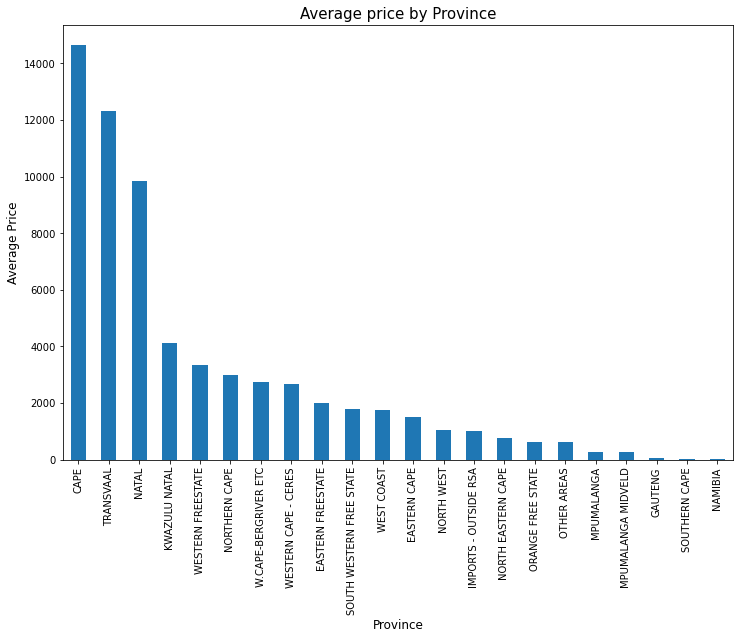

In [11]:
plt.figure(figsize=(12, 8))

df['Province'].value_counts().plot(kind='bar')

plt.title('Average price by Province', fontsize=15)

plt.xlabel('Province', fontsize=12)
plt.ylabel('Average Price', fontsize=12)
plt.show()

#### Checking for outliers in dataset

C:\Users\tyron\Anaconda3\lib\site-packages\numpy\core\_methods.py:160: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims)


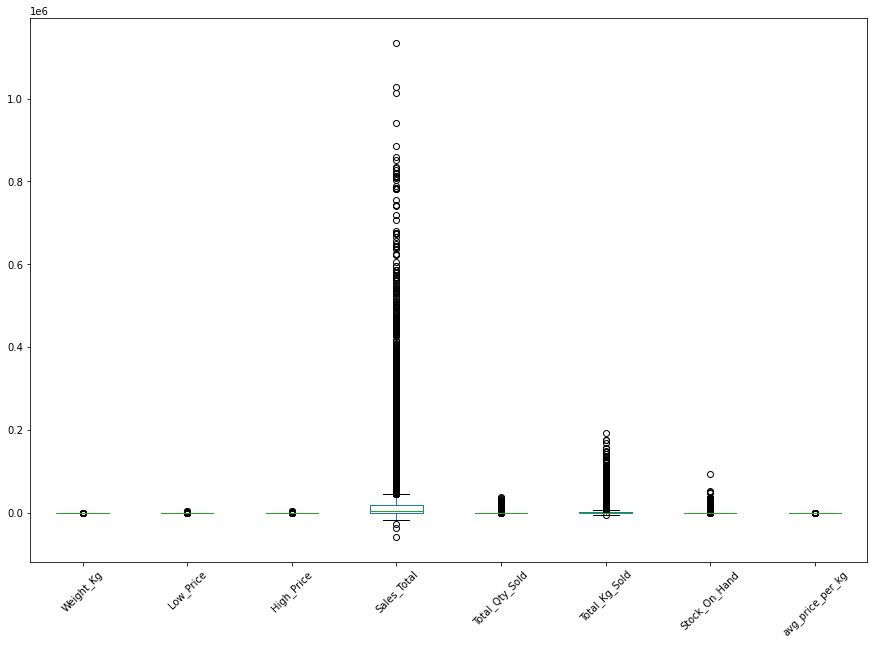

In [19]:
boxplot = df.boxplot(grid=False, rot=45, figsize=(15, 10));

The boxplot indicates that there are a number of outliers in the Sales Total and Stock on Hand

#### Let's take a closer look at these two boxplots and the target feature

<AxesSubplot:>

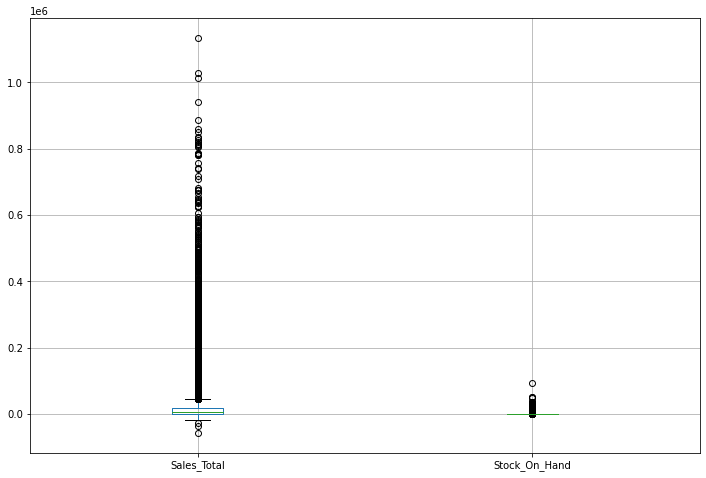

In [20]:
plt.figure(figsize=(12,8))

df[['Sales_Total', 'Stock_On_Hand']].boxplot()

There can be a number of reasons for the outlier data observed in dataset. The negative values for price, sales and stock on hand can be as a result of a number of reasons - incorrect entry, stock and sales may have been recorded as sold when in fact was stil in "production" and not in the warehouse. Having negative stock and negative sales therefore does not make sense, and must be corrected

<AxesSubplot:>

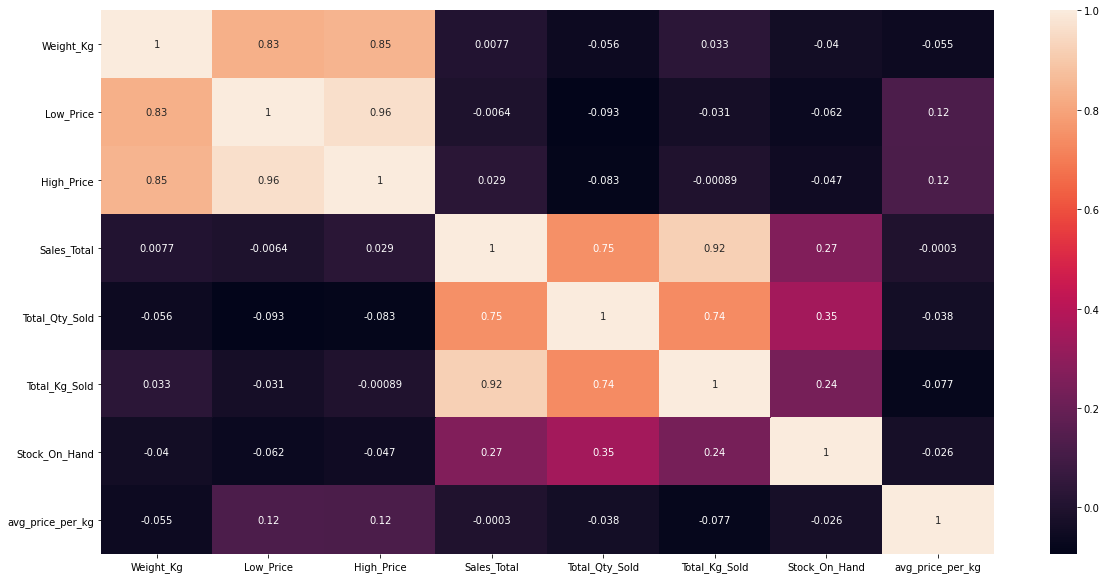

In [21]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(), annot=True)

Looking at the heatmap, the scale on the extreme right shows that a lighter shade has a stronger correlation, vs the darker shade a negative correlation. The target variable (avg_price_per_kg) does not have particularly strong correlation with any of the features, while it has some negative correlations with other features

#### Outlier Treatment


#### Quantile-based Flooring and Capping


In this technique, we will do the flooring (e.g., the 10th percentile) for the lower values and capping (e.g., the 90th percentile) for the higher values. The lines of code below print the percentiles of the variables respectively. These values will be used for quantile-based flooring and capping. To deal with the outliers in the dataset, I have set the floorig to 1% and the capping to 99%. This is done for the "avg_price_per_kg", "Sales_Total", "Stock_On_Hand", "Total_Qty_Sold" and "Total_Kg_Sold" features.

In [122]:
print(df['avg_price_per_kg'].quantile(0.01)) 
print(df['avg_price_per_kg'].quantile(0.99)) 

1.0
146.7327000000003


In [123]:
df['avg_price_per_kg'] = np.where(df['avg_price_per_kg'] < 1.0, 1.0,df['avg_price_per_kg'])
df['avg_price_per_kg'] = np.where(df['avg_price_per_kg'] > 146.0, 146.0,df['avg_price_per_kg'])
df['avg_price_per_kg'].describe()

count    64368.000000
mean         9.605749
std         16.923905
min          1.000000
25%          4.020000
50%          6.000000
75%          8.670000
max        146.000000
Name: avg_price_per_kg, dtype: float64

In [124]:
print(train['Sales_Total'].quantile(0.01)) 
print(train['Sales_Total'].quantile(0.99)) 

4.0
203928.58000000005


In [125]:
df['Sales_Total'] = np.where(df['Sales_Total'] < 4.0, 4.0,df['Sales_Total'])
df['Sales_Total'] = np.where(df['Sales_Total'] > 203946.0, 203946.0,df['Sales_Total'])
df['Sales_Total'].describe()

count     64368.000000
mean      18100.319371
std       33139.830007
min           4.000000
25%        1155.000000
50%        5400.000000
75%       18774.000000
max      203946.000000
Name: Sales_Total, dtype: float64

In [126]:
df['Stock_On_Hand'] = np.where(df['Stock_On_Hand'] < 0.0, 0.0,df['Stock_On_Hand'])
df['Stock_On_Hand'] = np.where(df['Stock_On_Hand'] > 5843.0, 5843.0,df['Stock_On_Hand'])
df['Stock_On_Hand'].describe()

count    64368.000000
mean       428.719022
std        928.789437
min          0.000000
25%          0.000000
50%         76.000000
75%        381.000000
max       5843.000000
Name: Stock_On_Hand, dtype: float64

In [127]:
print(df['Total_Qty_Sold'].quantile(0.01)) 
print(df['Total_Qty_Sold'].quantile(0.99)) 

1.0
5203.630000000019


In [128]:
df['Total_Qty_Sold'] = np.where(df['Total_Qty_Sold'] < 1.0, 1.0,df['Total_Qty_Sold'])
df['Total_Qty_Sold'] = np.where(df['Total_Qty_Sold'] > 5204.0, 5204.0,df['Total_Qty_Sold'])
df['Total_Qty_Sold'].describe()

count    64368.000000
mean       407.517944
std        813.183245
min          1.000000
25%         20.000000
50%        107.000000
75%        390.000000
max       5204.000000
Name: Total_Qty_Sold, dtype: float64

In [129]:
print(df['Total_Kg_Sold'].quantile(0.01)) 
print(df['Total_Kg_Sold'].quantile(0.99)) 

5.0
34800.0


In [130]:
df['Total_Kg_Sold'] = np.where(df['Total_Kg_Sold'] < 5.0, 5.0,df['Total_Kg_Sold'])
df['Total_Kg_Sold'] = np.where(df['Total_Kg_Sold'] > 34800.0, 34800.0,df['Total_Kg_Sold'])
df['Total_Kg_Sold'].describe()

count    64368.000000
mean      3103.344810
std       5707.002667
min          5.000000
25%        175.000000
50%        940.000000
75%       3253.000000
max      34800.000000
Name: Total_Kg_Sold, dtype: float64

In [131]:
df.shape

(64368, 13)

#### Merging the train and test data sets

In [16]:
data = pd.concat(objs = [df, df_test], axis = 0).reset_index(drop = True)

In [17]:
data.head()

,Province,Container,Size_Grade,Weight_Kg,Commodities,Date,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand,avg_price_per_kg,Index
0,CAPE,EC120,1L,12.0,APPLE GRANNY SMITH,2020-03-10,108.0,112.0,3236.0,29,348.0,0,9.30,NaN
1,CAPE,M4183,1L,18.3,APPLE GOLDEN DELICIOUS,2020-09-09,150.0,170.0,51710.0,332,6075.6,822,8.51,NaN
2,GAUTENG,AT200,1L,20.0,AVOCADO PINKERTON,2020-05-05,70.0,80.0,4860.0,66,1320.0,50,3.68,NaN
3,TRANSVAAL,BJ090,1L,9.0,TOMATOES-LONG LIFE,2020-01-20,60.0,60.0,600.0,10,90.0,0,6.67,NaN
4,WESTERN FREESTATE,PP100,1R,10.0,POTATO SIFRA (WASHED),2020-07-14,40.0,45.0,41530.0,927,9270.0,393,4.48,NaN


In [14]:
target = ['avg_price_per_kg']

#### Dropping the Container and Index columns from dataset, it has no bearing on the target feature

In [ ]:
data = data.drop(['Container', 'Index',], axis = 1)

 #### Date column is an object data type which is incorret. Let's change that column and split it into year and month

In [136]:
data['Year'] = data['Date'].apply(lambda x: int(str(x)[:4]))
data['Month'] = data['Date'].apply(lambda x: int(str(x)[5:7]))
data.drop(['Date'], axis=1, inplace=True)

In [137]:
data.head()

,Province,Size_Grade,Weight_Kg,Commodities,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand,avg_price_per_kg,Year,Month
0,CAPE,1L,12.0,APPLE GRANNY SMITH,108.0,112.0,3236.0,29.0,348.0,0.0,9.30,2020,3
1,CAPE,1L,18.3,APPLE GOLDEN DELICIOUS,150.0,170.0,51710.0,332.0,6075.6,822.0,8.51,2020,9
2,GAUTENG,1L,20.0,AVOCADO PINKERTON,70.0,80.0,4860.0,66.0,1320.0,50.0,3.68,2020,5
3,TRANSVAAL,1L,9.0,TOMATOES-LONG LIFE,60.0,60.0,600.0,10.0,90.0,0.0,6.67,2020,1
4,WESTERN FREESTATE,1R,10.0,POTATO SIFRA (WASHED),40.0,45.0,41530.0,927.0,9270.0,393.0,4.48,2020,7


#### Encoding Categorical Labels


For modeling using scikit-learn, all the variables should be numeric, so we will have to change the labels. There is an intrinsic ordering in the level of Size_Grade so I will use Label_Encoder to convert the values into ordered integer values to use in ML algorithms

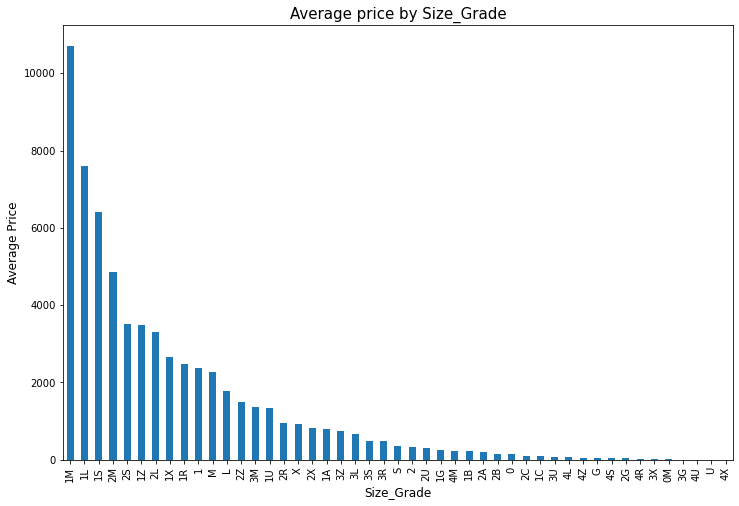

In [22]:
plt.figure(figsize=(12, 8))

df['Size_Grade'].value_counts().plot(kind='bar')

plt.title('Average price by Size_Grade', fontsize=15)

plt.xlabel('Size_Grade', fontsize=12)
plt.ylabel('Average Price', fontsize=12)
plt.show()

In [138]:
data['Size_Grade'] = data['Size_Grade'].map ({"1M" : 0, 
    "1L" : 1,
    "1S" : 2,
    "2M" : 3,
    "2S" : 4,
    "1Z" : 5,
    "2L" : 6,
    "1X" : 7,
    "1R" : 8,
    "1" : 9,
    "M" : 10,
    "L" : 11,
    "2Z" : 12,
    "3M" : 13,
    "1U" : 14,
    "2R" : 15,
    "X" : 16,
    "2X" : 17,
    "1A" : 18,
    "3Z" : 19,
    "3L" : 20,
    "3S" : 21,
    "3R" : 22,
    "S" : 23,
    "2" : 24,
    "2U" : 25,
    "1G" : 26,
    "4M" : 27,
    "1B" : 28,
    "2A" : 29,
    "2B" : 30,
    "0" : 31,
    "2C" : 32,
    "1C" : 33,
    "3U" : 34,
    "4L" : 35,
    "4Z" : 36,
    "G" : 37,
    "4S" : 38,
    "2G" : 39,
    "4R" : 40,
    "3X" : 41,
    "0M" : 42,
    "3G" : 43,
    "4U" : 44,
    "U" : 45,
    "4X" : 46
        })
 

In [139]:
data.head()

,Province,Size_Grade,Weight_Kg,Commodities,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand,avg_price_per_kg,Year,Month
0,CAPE,1,12.0,APPLE GRANNY SMITH,108.0,112.0,3236.0,29.0,348.0,0.0,9.30,2020,3
1,CAPE,1,18.3,APPLE GOLDEN DELICIOUS,150.0,170.0,51710.0,332.0,6075.6,822.0,8.51,2020,9
2,GAUTENG,1,20.0,AVOCADO PINKERTON,70.0,80.0,4860.0,66.0,1320.0,50.0,3.68,2020,5
3,TRANSVAAL,1,9.0,TOMATOES-LONG LIFE,60.0,60.0,600.0,10.0,90.0,0.0,6.67,2020,1
4,WESTERN FREESTATE,8,10.0,POTATO SIFRA (WASHED),40.0,45.0,41530.0,927.0,9270.0,393.0,4.48,2020,7


The table above shows the Size_Grade feature has been transformed to a numerical variable

#### Categorical values with no intrinsic order can be converted to numeric values using one-hot encoding

In [140]:
data = pd.get_dummies(data, columns=['Province'])

In [141]:
data = pd.get_dummies(data, columns=['Commodities'])

In [142]:
data.head()

,Size_Grade,Weight_Kg,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand,avg_price_per_kg,Year,...,Commodities_TANGELOS,Commodities_TAWNY SEEDLESS,Commodities_TOMATOES COCKTAIL,Commodities_TOMATOES JAM,Commodities_TOMATOES OTHER,Commodities_TOMATOES SALADETTE,Commodities_TOMATOES-LONG LIFE,Commodities_VALLEY GOLD,Commodities_WASHED POTATOES,Commodities_WATERMELON
0,1,12.0,108.0,112.0,3236.0,29.0,348.0,0.0,9.30,2020,...,0,0,0,0,0,0,0,0,0,0
1,1,18.3,150.0,170.0,51710.0,332.0,6075.6,822.0,8.51,2020,...,0,0,0,0,0,0,0,0,0,0
2,1,20.0,70.0,80.0,4860.0,66.0,1320.0,50.0,3.68,2020,...,0,0,0,0,0,0,0,0,0,0
3,1,9.0,60.0,60.0,600.0,10.0,90.0,0.0,6.67,2020,...,0,0,0,0,0,0,1,0,0,0
4,8,10.0,40.0,45.0,41530.0,927.0,9270.0,393.0,4.48,2020,...,0,0,0,0,0,0,0,0,0,0


In [143]:
train_len = len(df)
train = data[:train_len]
# to submit 
test = data[train_len:]
test.drop(labels=["avg_price_per_kg"],axis = 1,inplace=True)

C:\Users\tyron\Anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [144]:
train.shape


(64368, 303)

#### We now drop the label column from our train data.

In [145]:
train["avg_price_per_kg"] = train["avg_price_per_kg"].astype(int)

<ipython-input-145-a20a63cdbd5e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train["avg_price_per_kg"] = train["avg_price_per_kg"].astype(int)


In [146]:
columns_train = [col for col in data.columns.tolist() if col not in target]
label = train['avg_price_per_kg']
train = train[columns_train]
train.shape


(64368, 302)

#### With sklearn’s splitting function, we split our train data into train and validation sets

In [147]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(train, label, test_size = 0.30, random_state = 40)

#### Build, Predict and Evaluate the Regression Model


Implementing the various linear regression models using the scikit-learn library.


#### Evaluation Metrics
We will evaluate the performance of the model using two metrics - R-squared value and Root Mean Squared Error (RMSE).

R-squared values range from 0 to 1 and are commonly stated as percentages. It is a statistical measure that represents the proportion of the variance for a target variable that is explained by the independent variables. The other commonly used metric for regression problems is RMSE, that measures the average magnitude of the residuals or error. We will be using both these metrics to evaluate the model performance.

#### Linear Regression


The simplest form of regression is the linear regression, which assumes that the predictors have a linear relationship with the target variable. The input variables are assumed to have a Gaussian distribution. Another assumption is that the predictors are not highly correlated with each other (a problem called multi-collinearity).


In order to fit the linear regression model, the first step is to instantiate the algorithm that is done in the first line of code below. The second line fits the model on the training set.

In [148]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [149]:
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

LinearRegression(n_jobs=1)

In [150]:
pred_train_lr= lr.predict(X_train)
print("Linear Regression: ")
print("The RMSE for the train set is:",np.sqrt(mean_squared_error(y_train,pred_train_lr)))
print("The R2 score for the train set is:",r2_score(y_train, pred_train_lr))

pred_test_lr= lr.predict(X_test)
print("The RMSE for the test is:",np.sqrt(mean_squared_error(y_test,pred_test_lr))) 
print("The R2 score for the test set is:",r2_score(y_test, pred_test_lr))

Linear Regression: 
The RMSE for the train set is: 12.053518589454903
The R2 score for the train set is: 0.4850337659025795
The RMSE for the test is: 85145.02643710279
The R2 score for the test set is: -23969656.730432205


#### Regularized Regression
As discussed above, linear regression works by selecting coefficients for each independent variable that minimizes a loss function. However, if the coefficients are too large, it can lead to model over-fitting on the training dataset. Such a model will not generalize well on the unseen data. To overcome this shortcoming, we do regularization which penalizes large coefficients. The following sections of the guide will discuss the various regularization algorithms.


#### Ridge Regression
Ridge regression is an extension of linear regression where the loss function is modified to minimize the complexity of the model. This modification is done by adding a penalty parameter that is equivalent to the square of the magnitude of the coefficients.


The first line of code below instantiates the Ridge Regression model with an alpha value of 0.01. The second line fits the model to the training data.

The third line of code predicts, while the fourth and fifth lines print the evaluation metrics - RMSE and R-squared - on the training set. The same steps are repeated on the test dataset in the sixth to eight lines of code.

In [151]:
rr = Ridge(alpha=0.5)
rr.fit(X_train, y_train) 
pred_train_rr= rr.predict(X_train)
print("Ridge Regression: ")
print("The RMSE for the train set is:",np.sqrt(mean_squared_error(y_train,pred_train_rr)))
print("The R2 score for the train set is:",r2_score(y_train, pred_train_rr))

pred_test_rr= rr.predict(X_test)
print("The RMSE for the test set is:",np.sqrt(mean_squared_error(y_test,pred_test_rr))) 
print("The R2 score for the test set is:",r2_score(y_test, pred_test_rr))

Ridge Regression: 
The RMSE for the train set is: 12.05733946709296
The R2 score for the train set is: 0.4847072330624481
The RMSE for the test set is: 12.511274509800757
The R2 score for the test set is: 0.4824570828256831


#### Lasso Regression
Lasso regression, or the Least Absolute Shrinkage and Selection Operator, is also a modification of linear regression. In Lasso, the loss function is modified to minimize the complexity of the model by limiting the sum of the absolute values of the model coefficients (also called the l1-norm).


In scikit-learn, a lasso regression model is constructed by using the Lasso class. The first line of code below instantiates the Lasso Regression model with an alpha value of 0.01. The second line fits the model to the training data.

The third line of code predicts, while the fourth and fifth lines print the evaluation metrics - RMSE and R-squared - on the training set. The same steps are repeated on the test dataset in the sixth to eight lines of code.

In [152]:
model_lasso = Lasso(alpha=0.01)
model_lasso.fit(X_train, y_train) 
pred_train_lasso= model_lasso.predict(X_train)
print("Lasso Regression")
print("The RMSE for the train set is:",np.sqrt(mean_squared_error(y_train,pred_train_lasso)))
print("The R2 score for the train set is:",r2_score(y_train, pred_train_lasso))

pred_test_lasso= model_lasso.predict(X_test)
print("The RMSE for the test set is:",np.sqrt(mean_squared_error(y_test,pred_test_lasso))) 
print("The R2 score for the test set is:",r2_score(y_test, pred_test_lasso))

Lasso Regression
The RMSE for the train set is: 12.476443011141136
The R2 score for the train set is: 0.4482623204347066
The RMSE for the test set is: 13.061038615203039
The R2 score for the test set is: 0.43597456356954367


#### ElasticNet Regression
ElasticNet combines the properties of both Ridge and Lasso regression. It works by penalizing the model using both the l2-norm and the l1-norm.

In scikit-learn, an ElasticNet regression model is constructed by using the ElasticNet class. The first line of code below instantiates the ElasticNet Regression with an alpha value of 0.01. The second line fits the model to the training data.

The third line of code predicts, while the fourth and fifth lines print the evaluation metrics - RMSE and R-squared - on the training set. The same steps are repeated on the test dataset in the sixth to eight lines of code.

In [153]:
#Elastic Net
model_enet = ElasticNet(alpha = 0.01)
model_enet.fit(X_train, y_train) 
pred_train_enet= model_enet.predict(X_train)
print("ElasticNet Regression")
print("The MSE for the train set is:",np.sqrt(mean_squared_error(y_train,pred_train_enet)))
print("The R2 score for the train set is:",r2_score(y_train, pred_train_enet))

pred_test_enet= model_enet.predict(X_test)
print("The MSE for the test set is:",np.sqrt(mean_squared_error(y_test,pred_test_enet)))
print("The R2 score for the test set is:",r2_score(y_test, pred_test_enet))

ElasticNet Regression
The MSE for the train set is: 13.382381726936066
The R2 score for the train set is: 0.3652278018290004
The MSE for the test set is: 14.025697588192235
The R2 score for the test set is: 0.3495825194679808


#### Decision Trees
Decision Trees, also referred to as Classification and Regression Trees (CART), work for both categorical and continuous input and output variables. It works by splitting the data into two or more homogeneous sets based on the most significant splitter among the independent variables. The best differentiator is the one that minimizes the cost metric. The cost metrics for a classification tree is often the entropy or the gini index, whereas, for a regression tree, the default metric is the mean squared error.


We will now create a CART regression model using the DecisionTreeRegressor class. The first step is to instantiate the algorithm that is done in the first line of code below. The second line fits the model on the training set. The arguments used are max_depth, which indicates the maximum depth of the tree, and min_samples_leaf, that indicates the minimum number of samples required to be at a leaf node.

In [154]:
dtree = DecisionTreeRegressor(max_depth=8, min_samples_leaf=0.13, random_state=3)

dtree.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=8, min_samples_leaf=0.13, random_state=3)

Once the model is built on the training set, we can make the predictions. The first line of code below predicts on the training set. The second and third lines of code prints the evaluation metrics - RMSE and R-squared - on the training set. The same steps are repeated on the test dataset in the fourth to sixth lines.

In [155]:
# Code lines 1 to 3
pred_train_tree= dtree.predict(X_train)
print("Decision Trees:")
print("The RMSE for the train set is:",np.sqrt(mean_squared_error(y_train,pred_train_tree)))
print("The R2 score for the train set is:",r2_score(y_train, pred_train_tree))

# Code lines 4 to 6
pred_test_tree= dtree.predict(X_test)
print("The RMSE for the test is:",np.sqrt(mean_squared_error(y_test,pred_test_tree))) 
print("The R2 score for the test is:",r2_score(y_test, pred_test_tree))

Decision Trees:
The RMSE for the train set is: 15.06641568503672
The R2 score for the train set is: 0.1954167989231359
The RMSE for the test is: 15.638171663082476
The R2 score for the test is: 0.19143448364161308


The above output shows that the RMSE is 15.06641568503672 for train data and 15.60225929945864 for test data. On the other hand, the R-squared value is 19.5 percent for train data and 19.1 percent for test data. This model performs poorly, but let's check if we can do better by doing hyperparameter tuning. We will be changing the values of the parameter, 'max_depth', to see how that affects the model performance.

The first four lines of code below instantiates and fits the regression trees with 'max_depth' parameter of 2 and 5, respectively. The fifth and sixth lines of code generate predictions on the training data, whereas the seventh and eight lines of code gives predictions on the testing data.

In [156]:
# Code Lines 1 to 4: Fit the regression tree 'dtree1' and 'dtree2' 
dtree1 = DecisionTreeRegressor(max_depth=2)
dtree2 = DecisionTreeRegressor(max_depth=5)
dtree1.fit(X_train, y_train)
dtree2.fit(X_train, y_train)

# Code Lines 5 to 6: Predict on training data
tr1 = dtree1.predict(X_train)
tr2 = dtree2.predict(X_train) 

#Code Lines 7 to 8: Predict on testing data
y1 = dtree1.predict(X_test)
y2 = dtree2.predict(X_test) 

In [157]:
# Print RMSE and R-squared value for regression tree 'dtree1' on training data
print("Decision Tree with Parameter Tuning max_dept = 2:")
print("The RMSE of the train set is:",np.sqrt(mean_squared_error(y_train,tr1))) 
print("The R2 score of the train set is:",r2_score(y_train, tr1))

# Print RMSE and R-squared value for regression tree 'dtree1' on testing data
print("The RMSE of the train set is:",np.sqrt(mean_squared_error(y_test,y1))) 
print("The R2 score of the test set is:",r2_score(y_test, y1)) 

Decision Tree with Parameter Tuning max_dept = 2:
The RMSE of the train set is: 8.365940298882112
The R2 score of the train set is: 0.7519263756597139
The RMSE of the train set is: 8.297805171066049
The R2 score of the test set is: 0.7723489118892509


In [158]:
# Print RMSE and R-squared value for regression tree 'dtree2' on training data
print("Decision Tree with Parameter Tuning max_dept = 5:")
print("The RMSE of the train set is:",np.sqrt(mean_squared_error(y_train,tr1))) 
print("The R2 score of the train set is:",r2_score(y_train, tr1))

# Print RMSE and R-squared value for regression tree 'dtree1' on testing data
print("The RMSE of the train set is:",np.sqrt(mean_squared_error(y_test,y1))) 
print("The R2 score of the test set is:",r2_score(y_test, y1)) 

Decision Tree with Parameter Tuning max_dept = 5:
The RMSE of the train set is: 8.365940298882112
The R2 score of the train set is: 0.7519263756597139
The RMSE of the train set is: 8.297805171066049
The R2 score of the test set is: 0.7723489118892509


The above output for 'dtree1' model shows that the RMSE is 8.365940298882112 for train data and 8.297805171066049 for test data. The R-squared value is 75.2 percent for train and 77.2 percent for test data. Hyperparameter tuning has vastly improved this model.

There is no improvement in dtree2 with a max_dept parameter of 5, but it demonstrates how parameter tuning can improve the model performance

#### Random Forest 

Random Forest (or Bootstrap Aggregation)
Decision Trees are useful, but the problem is that they often tend to overfit the training data leading to high variances in the test data. Random Forest algorithms overcome this shortcoming by reducing the variance of the decision trees. They are called 'Forest' because they are the collection, or ensemble, of several decision trees. One major difference between a Decision Tree and a Random Forest model is on how the splits happen. In Random Forest, instead of trying splits on all the features, a sample of features is selected for each split, thereby reducing the variance of the model.

In scikit-learn, the RandomForestRegressor class is used for building regression trees. The first line of code below instantiates the Random Forest Regression model with the 'n_estimators' value of 500. 'n_estimators' indicates the number of trees in the forest. The second line fits the model to the training data.

The third line of code predicts, while the fourth and fifth lines print the evaluation metrics - RMSE and R-squared - on the training set. The same steps are repeated on the test dataset in the sixth to eight lines of code.

In [159]:
#RF model
model_rf = RandomForestRegressor(n_estimators=500, oob_score=True, random_state=100)
model_rf.fit(X_train, y_train) 
pred_train_rf= model_rf.predict(X_train)
print("Random Forest Model:")
print("The RMSE of the train set is:",np.sqrt(mean_squared_error(y_train,pred_train_rf)))
print("The R2 score of the train set is:",r2_score(y_train, pred_train_rf))

pred_test_rf = model_rf.predict(X_test)
print("The RMSE of the test set is:",np.sqrt(mean_squared_error(y_test,pred_test_rf)))
print("The R2 score of the test set is:",r2_score(y_test, pred_test_rf))

Random Forest Model:
The RMSE of the train set is: 0.5194711517749416
The R2 score of the train set is: 0.9990435243049212
The RMSE of the test set is: 1.6422406838340664
The R2 score of the test set is: 0.9910830387970506


We observed that the Random Forest model outperforms the Regression Tree models, with the test set RMSE and R-squared values of 1.6422406838340664 and 99.1 percent, respectively on the test data. 

#### Creating a dataframe with the target feature to make a submission to Kaggle

In [160]:
price_predicted = pd.Series(model_rf.predict(test), name="avg_price_per_kg")

In [161]:
Index = df_test["Index"]
results = pd.concat([Index, price_predicted], axis=1)

In [162]:
results.shape

(685, 2)

#### Creating a csv file for Submission to Kaggle

In [163]:
results.to_csv("random_forest_1.csv",index = False)

Score on Kaggle is 0.06295 with fourth place on the leaderboard

#### References

- Grobler, J. (2021). Introduction to Data Science: Business understanding. University of Stellenbosch, Faculty of Engineering. 
- Grobler, J. (2021). Introduction to Data Science: Crisp-DM. University of Stellenbosch, Faculty of Engineering. 
- Grobler, J. (2021). Introduction to Data Science: Data preparation. University of Stellenbosch, Faculty of Engineering. 
- Grobler, J. (2021). Introduction to Data Science: Data understanding. University of Stellenbosch, Faculty of Engineering. 
https://www.pluralsight.com/guides/validating-machine-learning-models-scikit-learn
- Kasongo, S. (2021). Linear Regression. University of Stellenbosch, Faculty of Engineering. 
- Kasongo, S. (2021). Machine Learning. University of Stellenbosch, Faculty of Engineering. 
- Kelleher, J.D., Mac Namee, B., & D’ Arcy, A. (2015). Machine learning for predictive data analytics. Fundamentals of Machine Learning for Predictive Analytics: Algorithms, Worked Examples, and Case Studies: pg. 491-509. The MIT Press.
- Manu, J. (2017). 50 Amazing big data and data science quotes to inspire you. Retrieved from https://edvancer.in/50-amazing-big-data-and-data-science-quotes-to-inspire-you/
- Singh, D. (2019). Scikit Machine Learning. Retrieved from https://www.pluralsight.com/guides/scikit-machine-learning
- Singh, D. (2019). Validating Machine Learning Models with scikit-learn. Retrieved from https://www.pluralsight.com/guides/validating-machine-learning-models-scikit-learn/
